# Mixing

In [1]:
import torch
import numpy as np

In [2]:
import torch
import torchvision

In [3]:
np.random.seed(42)

In [4]:
from mutinfo.distributions.mixing.label import paired_by_label

In [5]:
config = {}

In [6]:
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [7]:
config["dataset"] = "MNIST"
#config["dataset"] = "CIFAR10"
config["n_classes"] = 10

train_dataset = getattr(torchvision.datasets, config["dataset"])(root="./.cache", download=True, transform=image_transform)
test_dataset  = getattr(torchvision.datasets, config["dataset"])(root="./.cache", download=True, transform=image_transform, train=False)

In [8]:
from scipy.stats import randint

random_variable = paired_by_label([train_dataset, train_dataset], randint(low=0, high=config["n_classes"]))

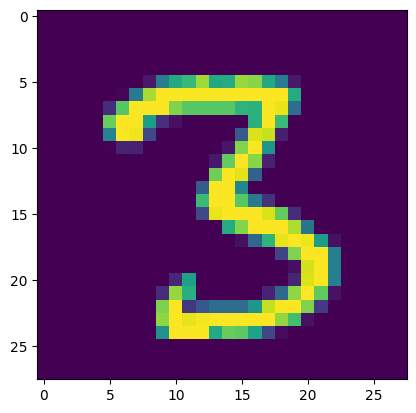

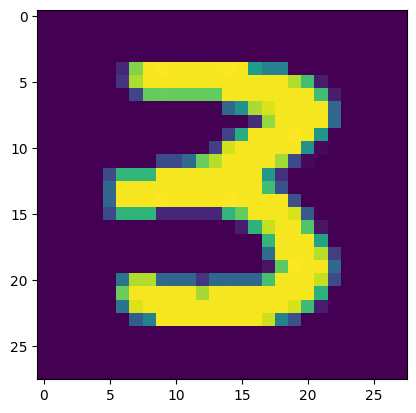

In [9]:
import matplotlib.pyplot as plt

sampling = random_variable.rvs(10)
plt.imshow(train_dataset[sampling[0][0]][0][0].detach().cpu().numpy())
plt.show()
plt.imshow(train_dataset[sampling[1][0]][0][0].detach().cpu().numpy())
plt.show()

In [10]:
random_variable.mutual_information

2.302585092994046

In [11]:
class PairedDataset(torch.utils.data.Dataset):
    def __init__(self, datasets, indices) -> None:
        self.datasets = datasets
        self.indices = indices

    def __getitem__(self, index: int):
        return tuple(dataset[self.indices[dataset_index][index]][0] for dataset_index, dataset in enumerate(self.datasets))

    def __len__(self) -> int:
        return len(self.indices[0])

In [12]:
paired_train_dataset = PairedDataset([train_dataset, train_dataset], random_variable.rvs(10000))

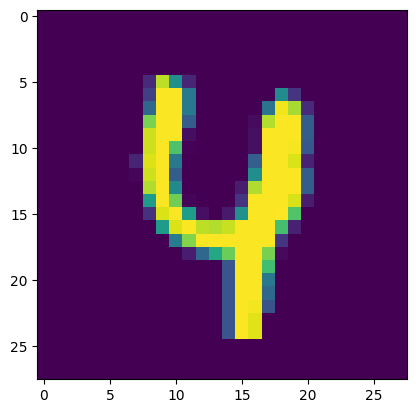

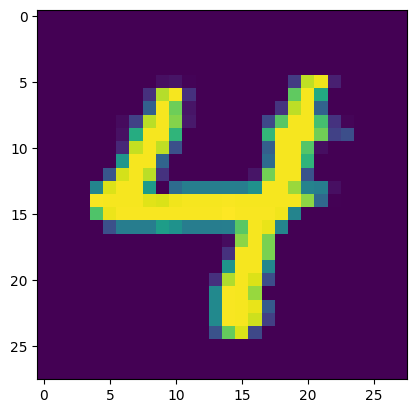

In [13]:
sample = paired_train_dataset[42]

plt.imshow(sample[0][0].detach().cpu().numpy())
plt.show()
plt.imshow(sample[1][0].detach().cpu().numpy())
plt.show()

In [14]:
samples = torch.tensor([[1.0, 3.0], [3.0, 7.0], [2.0, 4.0], [0.0, 8.0], [10.0, 2.0]])
labels = torch.tensor([0, 0, 1, 1, 1])

In [15]:
import torch

def permute_pairs_preserve_labels(
    samples: torch.Tensor,
    labels: torch.Tensor
) -> tuple[torch.Tensor, torch.Tensor]:
    unique_labels = labels.unique()

    subsets_indices = []
    permuted_subsets_indices = []
    for label in unique_labels:
        subset_indices = (labels == label).nonzero().squeeze()
        subsets_indices.append(subset_indices)
        permuted_subsets_indices.append(subset_indices[torch.randperm(subset_indices.shape[0])])

    indices = torch.cat(subsets_indices, axis=0)
    permuted_indices = torch.cat(permuted_subsets_indices, axis=0)

    return samples[indices], samples[permuted_indices]

In [16]:
permute_pairs_preserve_labels(samples, labels)

(tensor([[ 1.,  3.],
         [ 3.,  7.],
         [ 2.,  4.],
         [ 0.,  8.],
         [10.,  2.]]),
 tensor([[ 1.,  3.],
         [ 3.,  7.],
         [10.,  2.],
         [ 0.,  8.],
         [ 2.,  4.]]))